In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
import uproot_methods

In [2]:
# from ROOT import TLorentzVector
from ROOT import Math

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/06


In [3]:
rhorho_raw_H = np.load("HiggsCP_data/rhorho/rhorho_raw.data.npy")
rhorho_raw_Z = np.load("HiggsCP_data/rhorho/rhorhoZ_raw.data.npy")
df_rhorho_raw_H = pd.DataFrame(rhorho_raw_H)
df_rhorho_raw_Z = pd.DataFrame(rhorho_raw_Z)

In [4]:
rhorho_reco_H = np.load("HiggsCP_data/rhorho/rhorho_raw_recon/rhorho_raw.data.npy")
df_rhorho_reco_H = pd.DataFrame(rhorho_reco_H)

In [5]:
for i in range(4,30,5):
    df_rhorho_raw_H.drop(columns=i, inplace=True)
    df_rhorho_raw_Z.drop(columns=i, inplace=True)
    df_rhorho_reco_H.drop(columns=i, inplace=True)

In [6]:
particle_name = ['n', 'pi-', 'pi0_1', 'an', 'pi+', 'pi0_2']
df_rhorho_raw_H.columns = pd.MultiIndex.from_arrays([sum([[x]*4 for x in particle_name],[]), ['p_x', 'p_y', 'p_z', 'E']*6])
df_rhorho_raw_Z.columns = pd.MultiIndex.from_arrays([sum([[x]*4 for x in particle_name],[]), ['p_x', 'p_y', 'p_z', 'E']*6])
df_rhorho_reco_H.columns = pd.MultiIndex.from_arrays([sum([[x]*4 for x in particle_name],[]), ['p_x', 'p_y', 'p_z', 'E']*6])

In [7]:
df_rhorho_H_sampled = df_rhorho_raw_H.sample(n=df_rhorho_reco_H.shape[0], replace=False, axis=0)

### Coverting p4 to PtEtaPhi

In [80]:
particle_PtEtaPhi={}
for particle in particle_name:
    total_res={}
    for index, row in tqdm(df_rhorho_H_sampled[particle].iterrows(),total=df_rhorho_H_sampled[particle].shape[0]):
        res=Math.PxPyPzEVector(*row.values.tolist())
        total_res[index]=(res.pt(), res.eta(), res.phi())
    particle_PtEtaPhi[particle]=total_res

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

In [20]:
pickle.dump(particle_PtEtaPhi,open('particle_PtEtaPhi.pk','wb'))

In [8]:
particle_PtEtaPhi_reco={}
for particle in particle_name:
    total_res_reco={}
    for index, row in tqdm(df_rhorho_reco_H[particle].iterrows(),total=df_rhorho_reco_H[particle].shape[0]):
        res=Math.PxPyPzEVector(*row.values.tolist())
        total_res_reco[index]=(res.pt(), res.eta(), res.phi())
    particle_PtEtaPhi_reco[particle]=total_res_reco

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

  0%|          | 0/146974 [00:00<?, ?it/s]

In [9]:
pickle.dump(particle_PtEtaPhi_reco,open('PtEtaPhi_data/particle_PtEtaPhi_reco.pk','wb'))

In [10]:
particle_PtEtaPhi=pd.read_pickle('PtEtaPhi_data/particle_PtEtaPhi.pk')
particle_PtEtaPhi_reco=pd.read_pickle('PtEtaPhi_data/particle_PtEtaPhi_reco.pk')

In [11]:
PtEtaPhi = [pd.DataFrame(particle_PtEtaPhi[particle].values(),columns=[particle+x for x in ['_pt','_eta','_phi']]) for particle in particle_name]
PtEtaPhi=pd.concat(PtEtaPhi,axis=1)

PtEtaPhi_reco = [pd.DataFrame(particle_PtEtaPhi_reco[particle].values(),columns=[particle+x for x in ['_pt','_eta','_phi']]) for particle in particle_name]
PtEtaPhi_reco=pd.concat(PtEtaPhi_reco,axis=1)

In [12]:
PtEtaPhi

,n_pt,n_eta,n_phi,pi-_pt,pi-_eta,pi-_phi,pi0_1_pt,pi0_1_eta,pi0_1_phi,an_pt,an_eta,an_phi,pi+_pt,pi+_eta,pi+_phi,pi0_2_pt,pi0_2_eta,pi0_2_phi
0,5.199149,0.585180,-0.998413,15.481587,0.705512,-0.934261,4.359225,0.788809,-0.927394,20.475359,2.072616,1.387150,77.090978,2.098101,1.403332,11.986482,2.064469,1.418620
1,21.915146,-0.733023,-1.937749,11.809175,-0.733382,-1.909015,48.011307,-0.749900,-1.892375,3.853300,-1.155713,0.696751,25.948106,-1.083394,0.805942,18.719124,-1.115204,0.792876
2,51.520297,-2.883713,0.211057,9.346855,-2.934152,0.204161,1.103943,-2.942377,0.305739,14.078844,-2.897299,-2.921923,5.304270,-2.940359,-3.018930,43.475940,-2.907549,-2.963011
3,9.385121,0.571347,-1.241022,56.758099,0.590553,-1.305594,2.532653,0.578015,-1.322285,39.288848,-0.090578,1.804493,4.914160,-0.165330,1.849175,6.578565,-0.052820,1.767299
4,27.482593,0.873144,-1.185102,4.921999,0.762941,-1.132543,11.188110,0.838353,-1.163212,38.210664,0.894163,-3.046361,11.204625,0.922273,-3.021367,86.915133,0.917406,-3.040436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16.512391,-3.559528,-3.129597,0.796939,-3.656931,-2.843119,5.294012,-3.603389,3.069195,19.359058,-1.106892,0.462306,9.889939,-1.129382,0.473428,22.912195,-1.178938,0.461460
999996,35.643087,-0.141655,1.399318,5.556800,-0.214614,1.429155,14.377128,-0.124295,1.439987,31.887524,-0.060818,-2.608737,10.889389,-0.050153,-2.596011,41.749596,-0.065221,-2.566687
999997,1.182243,-0.708714,-3.124027,16.438079,-0.905914,3.043596,33.887518,-0.884286,3.042186,37.635774,-1.886753,-0.427057,6.012449,-1.887420,-0.433866,16.777457,-1.949429,-0.432009
999998,2.190450,1.195776,-1.110353,31.705257,1.132515,-0.946170,7.949139,1.163427,-0.983490,24.388963,-0.741442,1.314041,2.582408,-0.741619,1.256045,19.000191,-0.791591,1.261862


In [78]:
# fig,axis=plt.subplots(18,1,figsize=(8,80),dpi = 80)
# for i, feature in enumerate(PtEtaPhi.columns):
#     sns.histplot(data=PtEtaPhi, x = feature, ax = axis[i])

### Truth PtEtaPhi Distributions vs Truth-matched PtEtaPhi Distributions

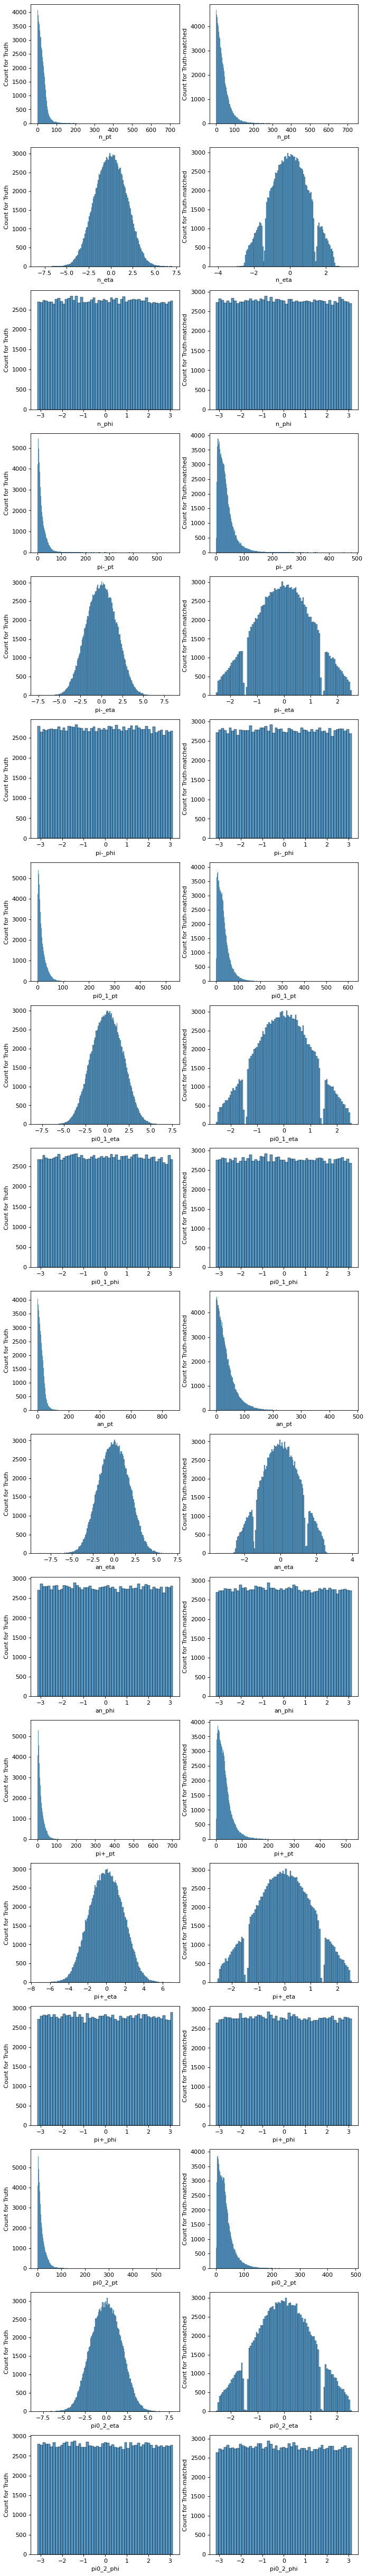

In [82]:
fig,axis=plt.subplots(18,2,figsize=(10,80),dpi = 80)
for i, ax in enumerate(axis):
    sns.histplot(data=PtEtaPhi, x = PtEtaPhi.columns[i], ax = ax[0])
    sns.histplot(data=PtEtaPhi_reco, x = PtEtaPhi_reco.columns[i], ax = ax[1])
    ax[0].set_ylabel('Count for Truth',fontsize=10)
    ax[1].set_ylabel('Count for Truth-matched',fontsize=10)

([<matplotlib.axis.XTick at 0x7f03616cd5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

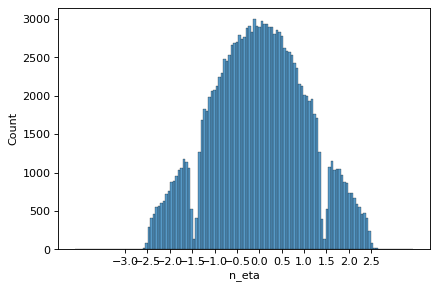

In [17]:
fig,axis=plt.subplots(dpi = 80)
sns.histplot(data=PtEtaPhi_reco, x = 'n_eta', ax = axis)
my_xticks = np.arange(-3,3,0.5)
plt.xticks(my_xticks)

### Input p4 Distributions

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(12,20),dpi = 80)
# for idx,name in enumerate(particle_name):   
# for hor_posi in range(3):
#     sns.scatterplot(data=df_rhorho_H[('pi-')], x=df_rhorho_H[('pi-')].columns[hor_posi],ax = ax[hor_posi])
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df_rhorho_raw_H[('an')], x='p_x', ax = ax[0,0])
sns.histplot(data=df_rhorho_raw_H[('an')], x='p_y', ax = ax[1,0])
sns.histplot(data=df_rhorho_raw_H[('an')], x='p_z', ax = ax[2,0])
sns.histplot(data=df_rhorho_raw_H[('an')], x='E', ax = ax[3,0])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_x', ax = ax[0,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_y', ax = ax[1,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_z', ax = ax[2,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='E', ax = ax[3,1])
# sns.histplot(data=df_rhorho_H[('pi+')], x='p_z', ax = ax[0,1])
# sns.histplot(data=df_rhorho_H[('pi+')], x='E', ax = ax[1,1])
ax[0,0].set_xlim((-100, 100))
ax[1,0].set_xlim((-100, 100))
ax[2,0].set_xlim((-100, 100))
ax[3,0].set_xlim((0, 750))
ax[0,1].set_xlim((-100, 100))
ax[1,1].set_xlim((-100, 100))
ax[2,1].set_xlim((-100, 100))
ax[3,1].set_xlim((0, 750))
for axis in ax:
    for axiss in axis:
        axiss.set_ylabel('Count for an',fontsize=10)
        axiss.set_ylim((0, 30000))

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(12,20),dpi = 80)
# for idx,name in enumerate(particle_name):   
# for hor_posi in range(3):
#     sns.scatterplot(data=df_rhorho_H[('pi-')], x=df_rhorho_H[('pi-')].columns[hor_posi],ax = ax[hor_posi])
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=df_rhorho_H_sampled[('an')], x='p_x', ax = ax[0,0])
sns.histplot(data=df_rhorho_H_sampled[('an')], x='p_y', ax = ax[1,0])
sns.histplot(data=df_rhorho_H_sampled[('an')], x='p_z', ax = ax[2,0])
sns.histplot(data=df_rhorho_H_sampled[('an')], x='E', ax = ax[3,0])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_x', ax = ax[0,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_y', ax = ax[1,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='p_z', ax = ax[2,1])
sns.histplot(data=df_rhorho_reco_H[('an')], x='E', ax = ax[3,1])
# sns.histplot(data=df_rhorho_H[('pi+')], x='p_z', ax = ax[0,1])
# sns.histplot(data=df_rhorho_H[('pi+')], x='E', ax = ax[1,1])
ax[0,0].set_xlim((-100, 100))
ax[1,0].set_xlim((-100, 100))
ax[2,0].set_xlim((-500, 500))
ax[3,0].set_xlim((0, 750))
ax[0,1].set_xlim((-100, 100))
ax[1,1].set_xlim((-100, 100))
ax[2,1].set_xlim((-500, 500))
ax[3,1].set_xlim((0, 750))
for axis in ax:
    for axiss in axis:
        axiss.set_ylabel('Count for an',fontsize=10)
        axiss.set_ylim((0, 10000))

In [ ]:
for particle in particle_name:
    fig,ax=plt.subplots(4,2,figsize=(12,20),dpi = 80)
    # for idx,name in enumerate(particle_name):   
    # for hor_posi in range(3):
    #     sns.scatterplot(data=df_rhorho_H[('pi-')], x=df_rhorho_H[('pi-')].columns[hor_posi],ax = ax[hor_posi])
    # sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.histplot(data=df_rhorho_H_sampled[(particle)], x='p_x', ax = ax[0,0])
    sns.histplot(data=df_rhorho_H_sampled[(particle)], x='p_y', ax = ax[1,0])
    sns.histplot(data=df_rhorho_H_sampled[(particle)], x='p_z', ax = ax[2,0])
    sns.histplot(data=df_rhorho_H_sampled[(particle)], x='E', ax = ax[3,0])
    sns.histplot(data=df_rhorho_reco_H[(particle)], x='p_x', ax = ax[0,1])
    sns.histplot(data=df_rhorho_reco_H[(particle)], x='p_y', ax = ax[1,1])
    sns.histplot(data=df_rhorho_reco_H[(particle)], x='p_z', ax = ax[2,1])
    sns.histplot(data=df_rhorho_reco_H[(particle)], x='E', ax = ax[3,1])
    # sns.histplot(data=df_rhorho_H[('pi+')], x='p_z', ax = ax[0,1])
    # sns.histplot(data=df_rhorho_H[('pi+')], x='E', ax = ax[1,1])
    ax[0,0].set_xlim((-100, 100))
    ax[1,0].set_xlim((-100, 100))
    ax[2,0].set_xlim((-500, 500))
    ax[3,0].set_xlim((0, 750))
    ax[0,1].set_xlim((-100, 100))
    ax[1,1].set_xlim((-100, 100))
    ax[2,1].set_xlim((-500, 500))
    ax[3,1].set_xlim((0, 750))
        
    ax[0,0].set_ylabel('Count for '+ particle,fontsize=10)
    ax[1,0].set_ylabel('Count for '+ particle,fontsize=10)
    ax[2,0].set_ylabel('Count for '+ particle,fontsize=10)
    ax[3,0].set_ylabel('Count for '+ particle,fontsize=10)
    ax[0,1].set_ylabel('Count for '+ particle,fontsize=10)
    ax[1,1].set_ylabel('Count for '+ particle,fontsize=10)
    ax[2,1].set_ylabel('Count for '+ particle,fontsize=10)
    ax[3,1].set_ylabel('Count for '+ particle,fontsize=10)

### Correlations

In [ ]:
def corre_plot(df, figtitle='', ax_lable = ''):
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8), dpi=100)
    f.suptitle(figtitle, fontsize=14)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 15, as_cmap=True, s=95, l=50)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})
    ax.set_ylabel(ax_lable,fontsize=13)
    ax.set_xlabel('')
    
    return

corre_plot(df_rhorho_raw_H, figtitle='Raw Signal Dataset (Htt) Correlations', ax_lable= 'Input Four-momenta ')

In [ ]:
corre_plot(df_rhorho_reco_H, figtitle='Reco-level Signal Dataset (Htt) Correlations', ax_lable= 'Input Four-momenta ')

In [ ]:
corre_plot(df_rhorho_raw_Z, figtitle='Raw Background Dataset (Ztt) Correlations', ax_lable= 'Input Four-momenta ')

## Preprocessed Dataset Visualization

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle
from tqdm.notebook import tqdm
from Eearly_stop import *
import sys
import pandas as pd
import argparse
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import train_rhorho, train_a1rho, train_a1a1

types = {"nn_rhorho": train_rhorho.start,"nn_a1rho": train_a1rho.start,"nn_a1a1": train_a1a1.start}
parser = argparse.ArgumentParser(description='Train classifier')

decaymodes = ['rhorho', 'a1rho', 'a1a1']
decaymode = decaymodes[0]  ###### Change this to corresponding decaymode ############

parser.add_argument("-i", "--input", dest="IN", default='HiggsCP_data/'+ decaymode)
parser.add_argument("-t", "--type", dest="TYPE", choices=types.keys(), default='nn_'+ decaymode)
args, unknown = parser.parse_known_args()

In [ ]:
points_S=pickle.load(open(args.IN+'/events_wo_background.pk','rb'))

In [ ]:
df_rhorho_H_process = pd.DataFrame(points_S.train.x)
df_rhorho_H_process.columns = pd.MultiIndex.from_arrays([sum([[x]*4 for x in particle_name],[]), ['p_x', 'p_y', 'p_z', 'E']*6])
df_rhorho_H_process

### Correlations

In [ ]:
corre_plot(df_rhorho_H_process, figtitle='Preprocessed Signal Dataset (Htt) Correlations', ax_lable= 'Input Four-momenta ')

In [ ]:
points_S_B = pickle.load(open(args.IN+'/events_w_background.pk','rb'))
background=[]
background.append(points_S_B.train.x[points_S_B.train.weights.sum(axis=1)==0])
background.append(points_S_B.valid.x[points_S_B.valid.weights.sum(axis=1)==0])
background.append(points_S_B.test.x[points_S_B.test.weights.sum(axis=1)==0])
background=np.concatenate(background)

In [ ]:
df_rhorho_Z_process = pd.DataFrame(background)
df_rhorho_Z_process.columns = pd.MultiIndex.from_arrays([sum([[x]*4 for x in particle_name],[]), ['p_x', 'p_y', 'p_z', 'E']*6])
df_rhorho_Z_process

In [ ]:
corre_plot(df_rhorho_Z_process, figtitle='Preprocessed Background (Ztt) Dataset Correlations', ax_lable= 'Input Four-momenta ')

In [ ]:
df_rhorho_argmax = pd.DataFrame(points_S.train.argmaxs)
df_rhorho_argmax.columns = ['argmaxs']

In [ ]:
df_rhorho_argmax

In [ ]:
df_rhorho_weights = pd.DataFrame(points_S.train.weights)
df_rhorho_weights.columns = pd.MultiIndex.from_arrays([sum([['weights']*11],[]), df_rhorho_weights.columns])

In [ ]:
df_rhorho_weights

In [ ]:
df_rhorho_input = pd.concat([df_rhorho_H_process, df_rhorho_weights], axis=1)

In [ ]:
corre_plot(df_rhorho_input, figtitle='Preprocessed Signal (Htt) Dataset (with Lable) Correlations', ax_lable= 'Input Four-momenta and Lable ')

In [ ]:
weight_argmaxs = np.argmax(points_S.train.weights, axis=1)

In [ ]:
_,counts=np.unique(weight_argmaxs,return_counts=True)

In [ ]:
counts

In [ ]:
df_weight_argmaxs = pd.DataFrame(weight_argmaxs)
df_weight_argmaxs

In [ ]:
rhorho_weights_H = np.load("HiggsCP_data/rhorho/rhorho_raw.w.npy").T
rhorho_weights_H